In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline


In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
df = pd.read_csv("seoul_covid19.csv")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,24267,78369,2021-01-31,타시도,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-4
1,24266,78472,2021-01-31,강남구,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-4
2,24265,78484,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-4
3,24264,78471,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-4
4,24263,78415,2021-01-31,타시도,-,타시도 확진자 접촉,치료중,21-01,21-01-31,1,4,2021-4
...,...,...,...,...,...,...,...,...,...,...,...,...
24262,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-5
24263,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-5
24264,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-5
24265,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-5


In [6]:
df["거주지"] = df["거주지"].astype(str).str.strip()

In [7]:
df["거주지"].unique()

array(['타시도', '강남구', '광진구', '용산구', '기타', '동대문구', '성동구', '서초구', '영등포구',
       '중구', '양천구', '강서구', '금천구', '노원구', '관악구', '동작구', '중랑구', '구로구',
       '성북구', '마포구', '강동구', '송파구', '강북구', '도봉구', '서대문구', '종로구', '은평구'],
      dtype=object)

<AxesSubplot:>

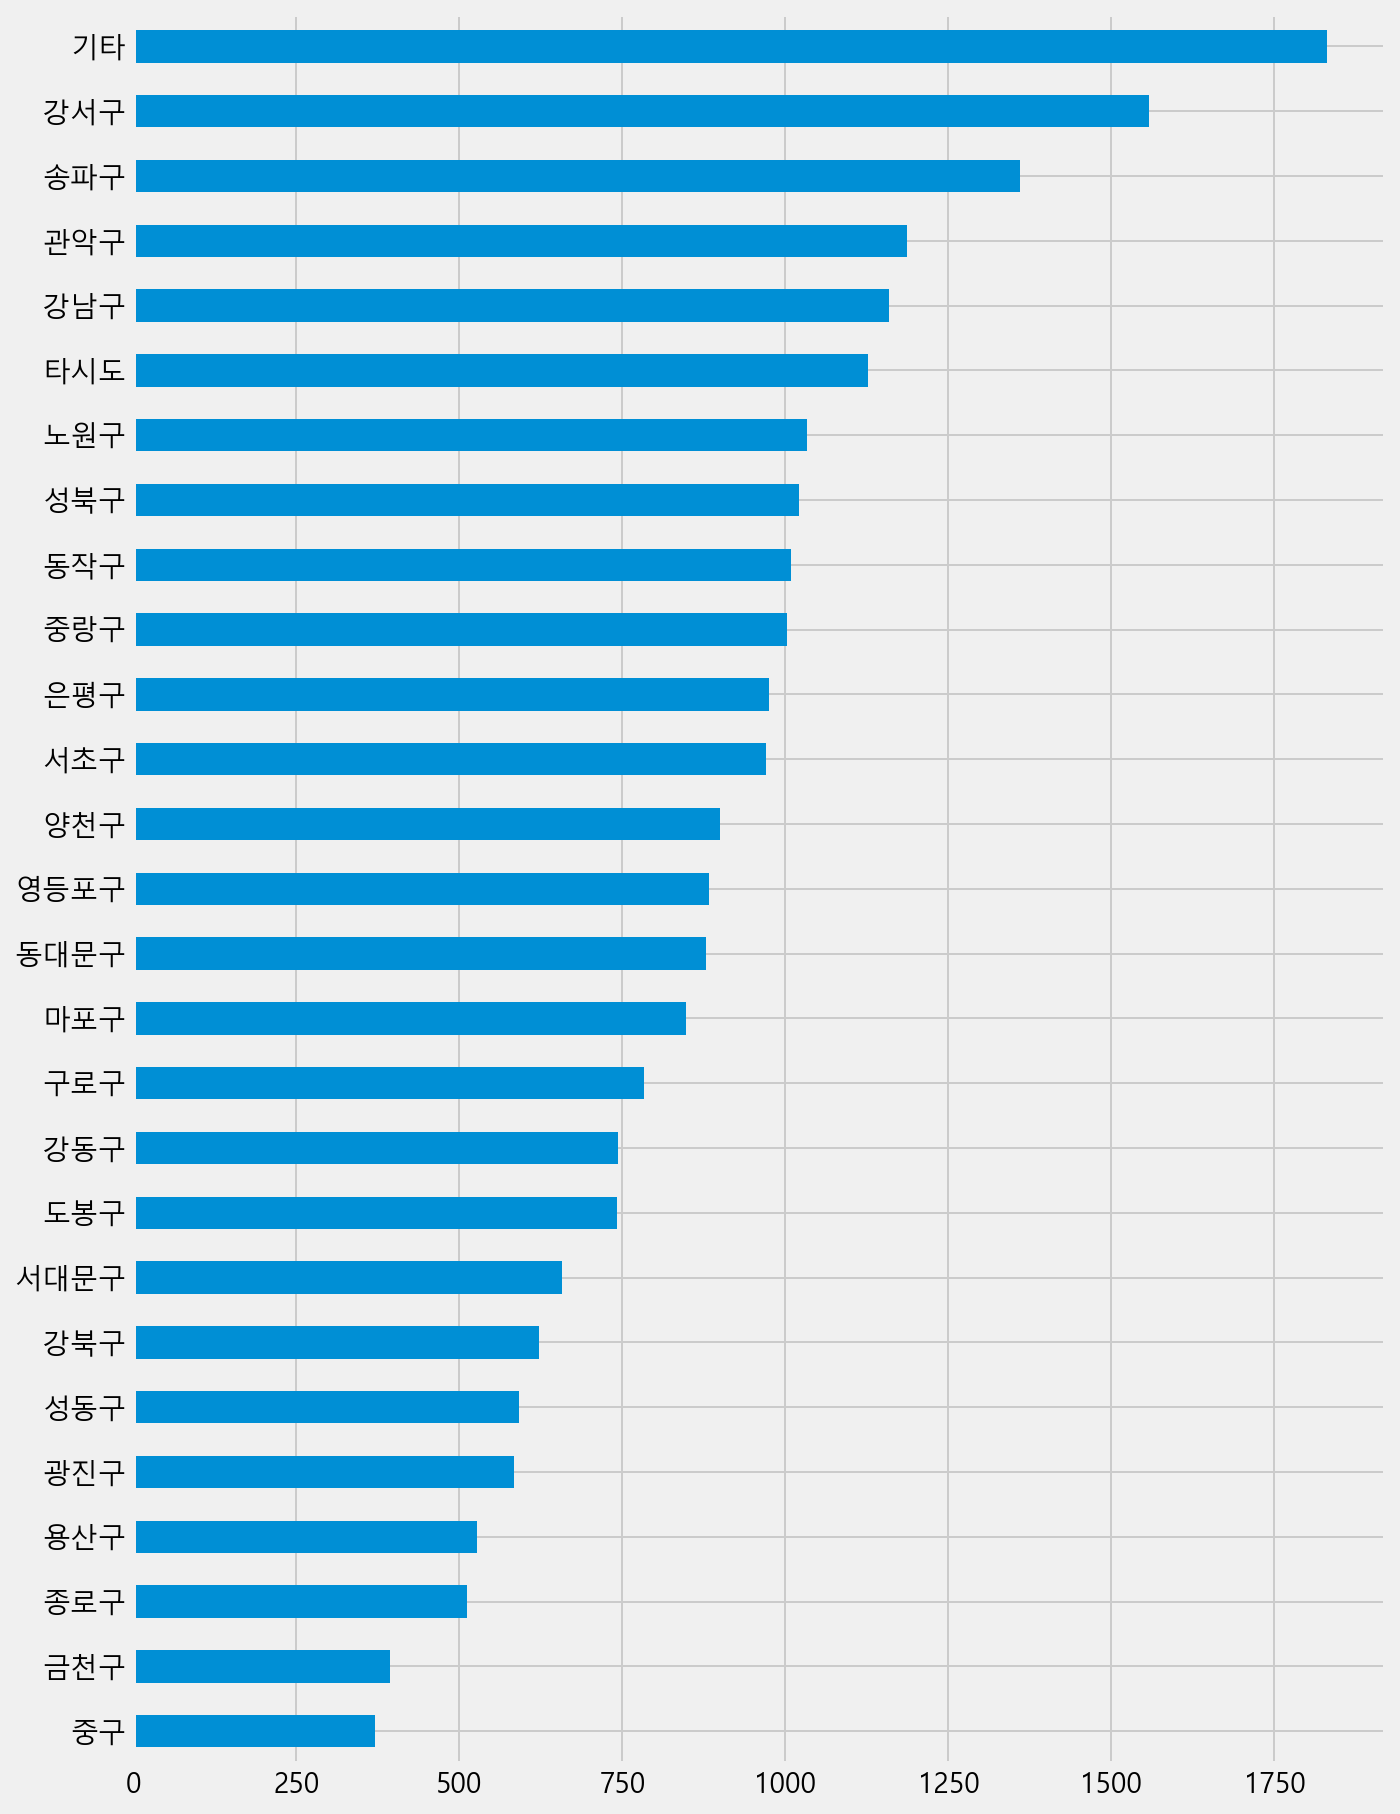

In [8]:
df["거주지"].value_counts().sort_values().plot.barh(figsize=(10,15))

In [9]:
gu_count = df["거주지"].value_counts()
gu_count

기타      1830
강서구     1558
송파구     1360
관악구     1187
강남구     1159
타시도     1127
노원구     1033
성북구     1021
동작구     1008
중랑구     1003
은평구      975
서초구      970
양천구      900
영등포구     883
동대문구     878
마포구      847
구로구      783
강동구      744
도봉구      742
서대문구     658
강북구      622
성동구      592
광진구      584
용산구      527
종로구      512
금천구      394
중구       370
Name: 거주지, dtype: int64

In [10]:
gu_count.index

Index(['기타', '강서구', '송파구', '관악구', '강남구', '타시도', '노원구', '성북구', '동작구', '중랑구',
       '은평구', '서초구', '양천구', '영등포구', '동대문구', '마포구', '구로구', '강동구', '도봉구', '서대문구',
       '강북구', '성동구', '광진구', '용산구', '종로구', '금천구', '중구'],
      dtype='object')

In [11]:
gu = ('강서구', '송파구', '관악구', '강남구', '동작구', '노원구', '성북구', '중랑구','은평구', '서초구', '양천구', '영등포구', '동대문구', '마포구', '구로구', '강동구', '도봉구', '서대문구','강북구', '성동구', '광진구', '용산구', '종로구', '금천구', '중구')

In [12]:
set(gu_count.index)-set(gu)

{'기타', '타시도'}

In [13]:
df_gu = gu_count.reset_index()
df_gu.columns = ["구","확진수"]
df_gu

,구,확진수
0,기타,1830
1,강서구,1558
2,송파구,1360
3,관악구,1187
4,강남구,1159
5,타시도,1127
6,노원구,1033
7,성북구,1021
8,동작구,1008
9,중랑구,1003


In [14]:
df.loc[df["거주지"].isin(gu),"지역"] = df["거주지"]
df.loc[~df["거주지"].isin(gu),"지역"] = "타지역"
# df["지역"] = df["지역"].fillna("타지역")
# df.loc[df["지역"].isnull(),"지역"]="타지역"
df["지역"].unique()

array(['타지역', '강남구', '광진구', '용산구', '동대문구', '성동구', '서초구', '영등포구', '중구',
       '양천구', '강서구', '금천구', '노원구', '관악구', '동작구', '중랑구', '구로구', '성북구',
       '마포구', '강동구', '송파구', '강북구', '도봉구', '서대문구', '종로구', '은평구'],
      dtype=object)

In [15]:
df[["거주지","지역"]]

,거주지,지역
0,타시도,타지역
1,강남구,강남구
2,강남구,강남구
3,강남구,강남구
4,타시도,타지역
...,...,...
24262,성북구,성북구
24263,마포구,마포구
24264,종로구,종로구
24265,중랑구,중랑구


In [16]:
gu_etc_count = df["지역"].value_counts()

<AxesSubplot:>

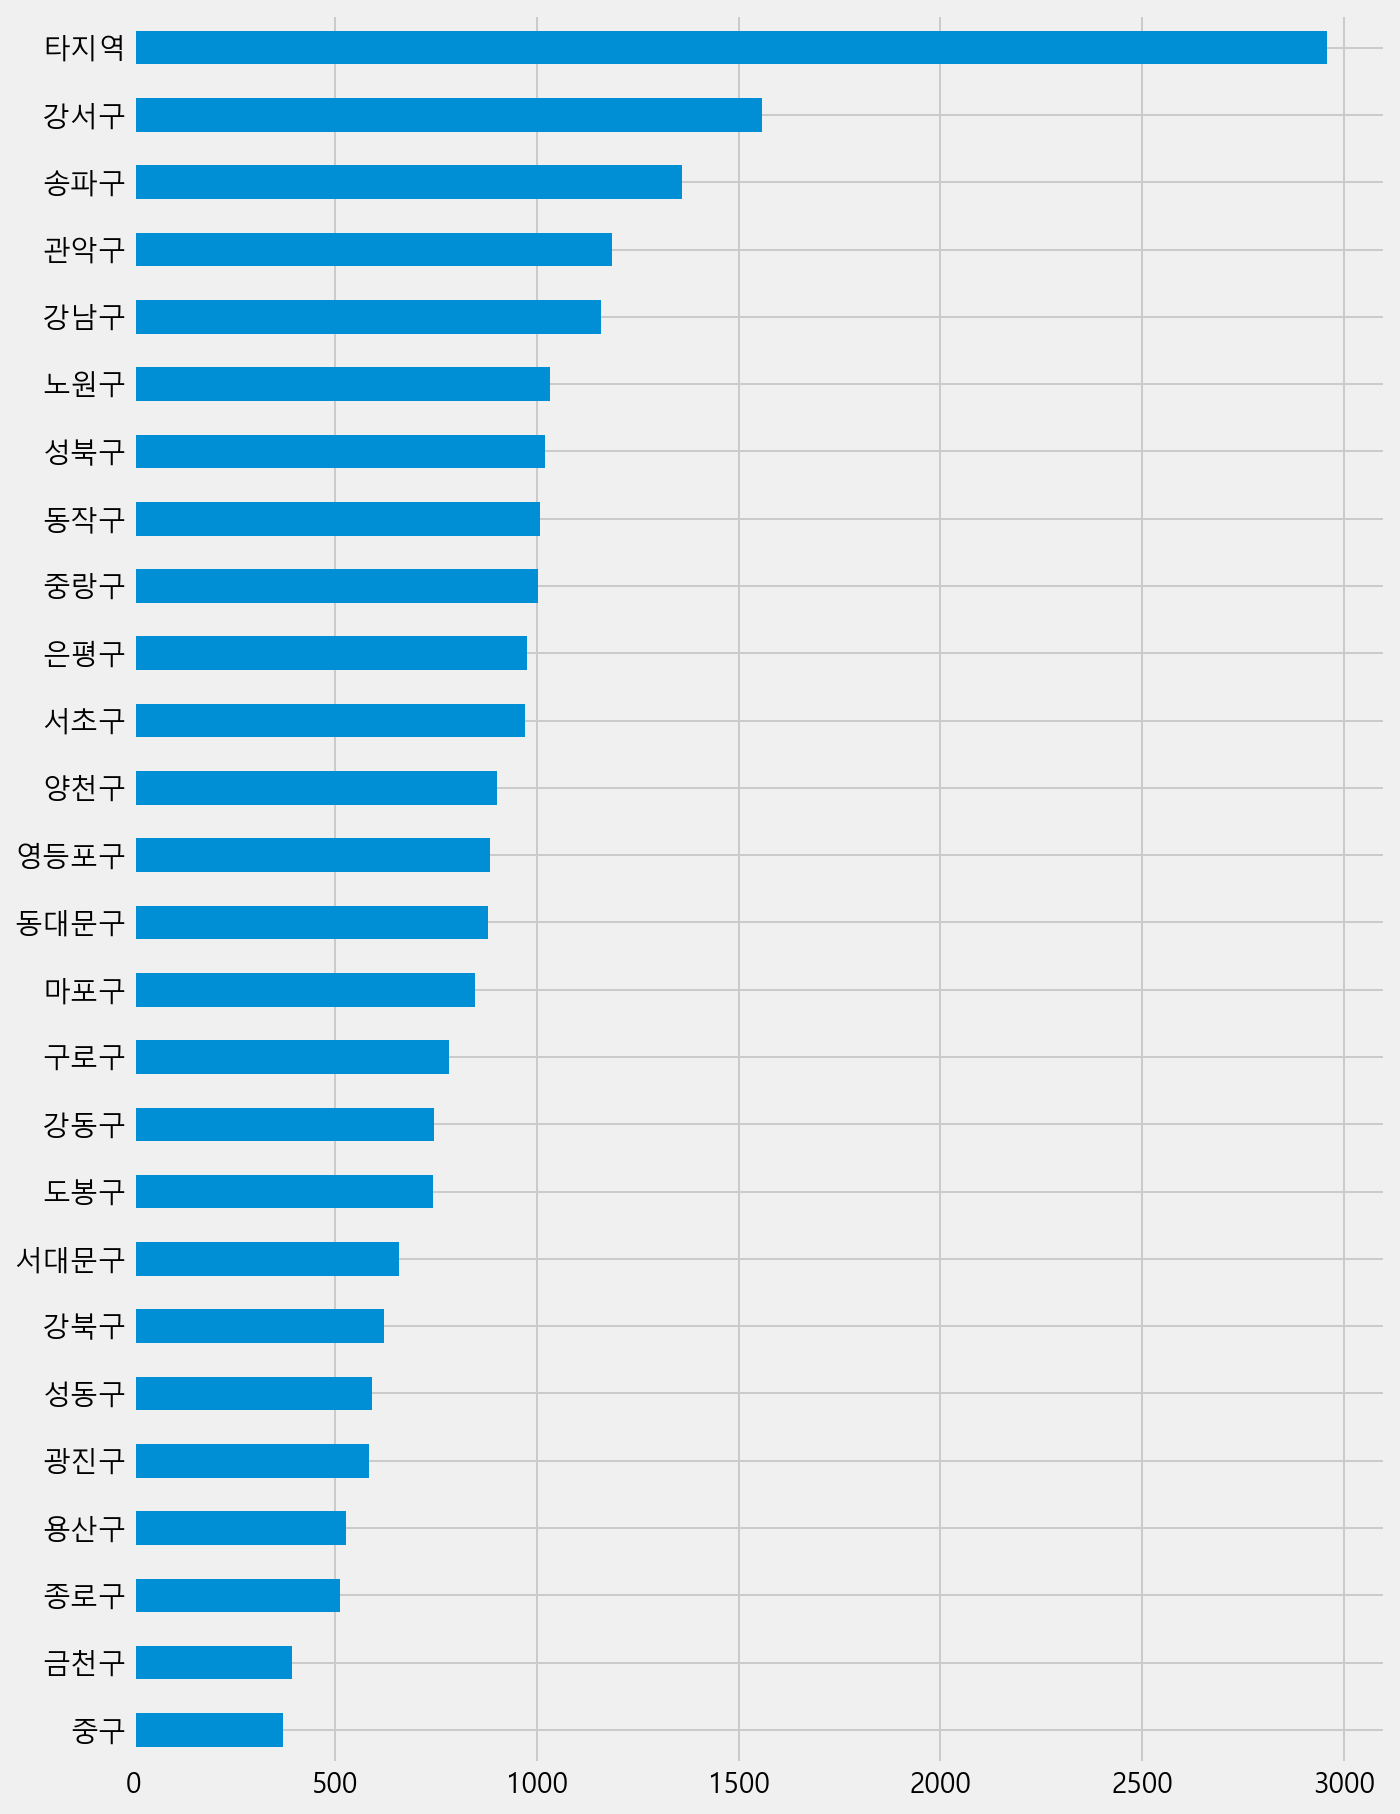

In [17]:
gu_etc_count.sort_values().plot.barh(figsize=(10,15))

In [18]:
df_loc = pd.read_csv("seoul_locate.csv",encoding="cp949")
df_loc.head()

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155


In [19]:
df_loc = df_loc.drop(["순번","시군구명_영문","ESRI_PK"],axis=1)
df_loc

,시군구코드,시군구명_한글,위도,경도
0,11320,도봉구,37.665861,127.031767
1,11380,은평구,37.617612,126.922700
2,11230,동대문구,37.583801,127.050700
3,11590,동작구,37.496504,126.944307
4,11545,금천구,37.460097,126.900155
5,11530,구로구,37.495486,126.858121
6,11110,종로구,37.599100,126.986149
7,11305,강북구,37.646995,127.014716
8,11260,중랑구,37.595379,127.093967
9,11680,강남구,37.495985,127.066409


In [20]:
df_loc = df_loc.rename({"시군구명_한글":"시군구명"},axis=1)
df_loc.head()

,시군구코드,시군구명,위도,경도
0,11320,도봉구,37.665861,127.031767
1,11380,은평구,37.617612,126.922700
2,11230,동대문구,37.583801,127.050700
3,11590,동작구,37.496504,126.944307
4,11545,금천구,37.460097,126.900155


In [21]:
df_gu.head()

,구,확진수
0,기타,1830
1,강서구,1558
2,송파구,1360
3,관악구,1187
4,강남구,1159


In [22]:
a = df_gu.merge(df_loc, how='inner', left_on="구", right_on="시군구명")
a.head()

,구,확진수,시군구코드,시군구명,위도,경도
0,강서구,1558,11500,강서구,37.565762,126.822656
1,송파구,1360,11710,송파구,37.504853,127.114482
2,관악구,1187,11620,관악구,37.465399,126.943807
3,강남구,1159,11680,강남구,37.495985,127.066409
4,노원구,1033,11350,노원구,37.655264,127.077120


In [23]:
df_gu = df_gu.merge(df_loc, how='inner', left_on="구", right_on="시군구명")
df_gu.head()

,구,확진수,시군구코드,시군구명,위도,경도
0,강서구,1558,11500,강서구,37.565762,126.822656
1,송파구,1360,11710,송파구,37.504853,127.114482
2,관악구,1187,11620,관악구,37.465399,126.943807
3,강남구,1159,11680,강남구,37.495985,127.066409
4,노원구,1033,11350,노원구,37.655264,127.077120


In [24]:
for i in df_gu.index:
    sub_long = df_gu.loc[i,"경도"]
    sub_lat = df_gu.loc[i,"위도"]
    print(df_gu.loc[i,"구"],sub_lat,sub_long)

강서구 37.5657617 126.8226561
송파구 37.5048534 127.1144822
관악구 37.465399299999994 126.9438071
강남구 37.4959854 127.0664091
노원구 37.655264 127.07712009999999
성북구 37.606991 127.0232185
동작구 37.4965037 126.94430729999999
중랑구 37.5953795 127.0939669
은평구 37.6176125 126.9227004
서초구 37.4769528 127.03781029999999
양천구 37.5219 126.8575
영등포구 37.520641 126.91392420000001
동대문구 37.5838012 127.0507003
마포구 37.562290600000004 126.9087803
구로구 37.4954856 126.858121
강동구 37.549207700000004 127.1464824
도봉구 37.6658609 127.0317674
서대문구 37.5820369 126.93566650000001
강북구 37.646995399999994 127.0147158
성동구 37.550675299999995 127.0409622
광진구 37.5481445 127.0857528
용산구 37.528582 126.98198700000002
종로구 37.5990998 126.98614930000001
금천구 37.460096899999996 126.90015459999998
중구 37.557945200000006 126.99419040000001


<AxesSubplot:xlabel='경도', ylabel='위도'>

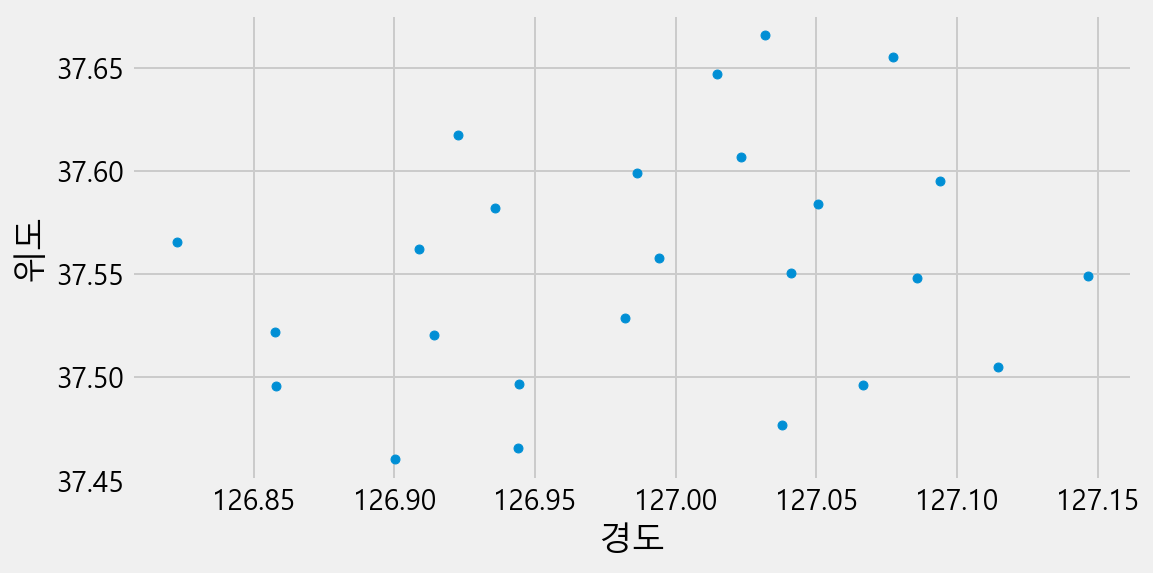

In [25]:
df_gu[["위도","경도"]].plot.scatter(x="경도",y="위도",figsize=(8,4))

In [26]:
import folium

In [27]:
long=df_gu["경도"].mean()
lat=df_gu["위도"].mean()
lat,long

(37.554138652, 126.99013328800001)

In [28]:
m = folium.Map(location=[lat, long],tiles="Stamen Toner")

for i in df_gu.index[:] :
    sub_lat = df_gu.loc[i,"위도"]
    sub_long = df_gu.loc[i,"경도"]
    title = df_gu.loc[i,"구"]+ "  :  " + df_gu.loc[i,"확진수"].astype(str)+ "명"

        
    folium.CircleMarker(
    [sub_lat, sub_long],radius=3, tooltip=title).add_to(m)
m

In [29]:
geo_path="seoul_municipalities_geo_simple.json"

import json
geo_json=json.load(open(geo_path,encoding="utf-8"))
geo_json["features"][0]["properties"]['name']

'강동구'

In [30]:
m = folium.Map(location=[lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_gu,
    columns=["구", "확진수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="구별 확진자수",
).add_to(m)

m

In [31]:
m = folium.Map(location=[lat, long],zoom_start=11,tiles="stamen toner")

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_gu,
    columns=["구", "확진수"],
    key_on="feature.properties.name",
    fill_color="GnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="구별 확진자수",
).add_to(m)

for i in df_gu.index[:] :
    sub_lat = df_gu.loc[i,"위도"]
    sub_long = df_gu.loc[i,"경도"]
    title = df_gu.loc[i,"구"]+ "  :  " + df_gu.loc[i,"확진수"].astype(str)+ "명"

    folium.Marker([sub_lat,sub_long],
                        fill=False,
                        tooltip=title,
                        ).add_to(m)
m

In [32]:
m = folium.Map(location=[lat, long],zoom_start=11,tiles="cartodbpositron")

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_gu,
    columns=["구", "확진수"],
    key_on="feature.properties.name",
    fill_color="GnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="구별 확진자수",
).add_to(m)

for i in df_gu.index[:] :
    sub_lat = df_gu.loc[i,"위도"]
    sub_long = df_gu.loc[i,"경도"]
    title = df_gu.loc[i,"구"]+ "  :  " + df_gu.loc[i,"확진수"].astype(str)+ "명"

    folium.Marker([sub_lat,sub_long],
                        fill=False,
                        tooltip=title,
                        ).add_to(m)
m